# DATA SCIENCE MUltiple Regression Project : Prediction Home Price in Banglore

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
data = pd.read_csv("B:\DATA_SCIENCE\Data_Science_IBM_Material\HAND's_on_Project\Realestateindia\house_dataset.csv")
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
# To check the shape of the sheet
data.shape

(13320, 9)

In [4]:
# To check the columns of the sheet
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
#now to check the unique data of the ---area_type---
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
# now will count the UNique data of count
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

# Handling NA Values & Un-targeted Variable(Features)

In [7]:
# Now let's drop the features, which is not require to consider in INdepedent Variable
data2 = data.drop(['availability', 'society', 'balcony','area_type'], axis = 'columns')
# we can also put-- axis = 0
data2.shape               

(13320, 5)

In [8]:
# DATA CLEANING: Handle NA Values

# Fistly check the null values in the file
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
# NOw we can drop all the null data directly without putting any mean or mediam value
data3 = data2.dropna()
data3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
data3.shape

(13246, 5)

# Features Engineering
Add new feature(integer) for bhk (Bedrooms Hall Kitchen) :- I mean, if we will see in the size, there is 4 bhk, 2 bhk, 3 bedroom, but all is in "String", i means being consider is in string. But to calculate the price, we have to convert the 2, 4, 3, number is in INTEGER, so that we could calculate the price based on that 2, 3, 4, 6...whatever

In [11]:
# Firstly check the size of the property
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
# you can check the Number Flats in Size
data3['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
19 BHK           1
13 BHK           1
18 Bedroom       1
14 BHK           1
12 Bedroom       1
16 BHK           1
43 Bedroom       1
27 BHK           1
Name: size, dtype: int64

In [13]:
# Now we will split the data to catch the number and then will separate from the string
# And will store in the new runtime created variable 'BHK'
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))
# now we the new columns has been created and stored with new value
#data3['bhk'].unique()
data3.bhk.unique()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
# Now we will see the dataset with new features variable 'bhk'
data3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [15]:
# Let me check the bedroom which has more than 20 bhk size
data3[data3.bhk>20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

Well it's look like a wrong data, i mean 43 beadroom in only 2400 sqft, it is wrong. In order to deal with this kind of error, we have to check all the sqft feature

In [16]:
# Let's check the every SQFT data in total_sqft
data3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

now you will another data error we got '1133-1384',we need to put all the values in one values

In [17]:
# Now will tackle with that range value '1111-222',something like this
# will firstly the float the value 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True



In [18]:
# now we will apply the float value in variable 'total_sqft'
#data3[data3['total_sqft'].apply(is_float)] # when we will apply this method, it will give TRUE value
data3.head(10)


location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2
5                Whitefield      2 BHK       1170   2.0   38.00    2
6          Old Airport Road      4 BHK       2732   4.0  204.00    4
7              Rajaji Nagar      4 BHK       3300   4.0  600.00    4
8              Marathahalli      3 BHK       1310   3.0   63.25    3
9              Gandhi Bazar  6 Bedroom       1020   6.0  370.00    6

In [19]:
# but we want not not-true value, so that we could deal with range value
# to this, i have to use ' Negate operation'
data3[~data3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

I mean, whenever we got range value, will convert all that into average value..Whenever other un-uniform data like :- 4125Perch, will drop that, we can do conversion into sqft or sqmeter, but right now will drop that

In [20]:
# In order to deal with this range
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
# To check the function
convert_sqft_to_num('2100-2850')

2475.0

In [22]:
convert_sqft_to_num('4125Perch')
# This return nothing, means working fine

In [23]:
# we will copy all data3 into new variable
df4 = data3.copy()
# now will apply function on df4.total_sqft
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2
5                Whitefield      2 BHK      1170.0   2.0   38.00    2
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3
9              Gandhi Bazar  6 Bedroom      1020.0   6.0  370.00    6

In [24]:
# Well if we do compaere with previous index value
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

#  Feature Engineering for new Columns
AS we all know the in realestate market, price per square is most important feature, this variable will help to remove outlier cleaning in later stage. For Outlier Dedication and Remover.

We will create new variable and copy that into and then will calculate the per square price on base of 1 lakhs amount. All price value is in Lakhs 

In [25]:
df5 = df4.copy()
df5['price_per_sqrt'] = df5['price']*100000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqrt  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [26]:
# now we will see the statics of price per sqrt features
df5_stats = df5['price_per_sqrt'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqrt, dtype: float64

In [27]:
# Let's save the data into another dataset
df5.to_csv("B:\DATA_SCIENCE\Data_Science_IBM_Material\HAND's_on_Project\Realestateindia\Bhp.csv", index = False)


#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

Now We might get in trouble with the location. Becuase in location there are many location, which can be impact on realdata..which called as DImension in the features. for this we have to do Dimensional Reducation

In [28]:
# To check the total location in Location Features
#df5['location'].unique() 
len(df5['location'].unique())

1304

In [29]:
# Location data is to big, so we need to firsly remove the space or space at the end of the lcoation
df5.location = df5.location.apply(lambda x: x.strip())
# Now going to create new varible to check the locations count 
#location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
# OR simply we can count by below code
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                           535
Sarjapur  Road                       392
Electronic City                      304
Kanakpura Road                       266
Thanisandra                          236
                                    ... 
Beml layout, Rajarajeshwari nagar      1
2Electronic City Phase II              1
Binnamangala                           1
Devarabisanahalli                      1
Malur Hosur Road                       1
Name: location, Length: 1293, dtype: int64

In [30]:
# Let's see the count of the total locations
location_stats.values.sum()

13246

In [31]:
# let's check the count of above 10 same place detail
len(location_stats[location_stats>10])

241

In [32]:
len(location_stats)

1293

In [33]:
# let's check the count of below 10 same place detail
len(location_stats[location_stats<=10])

1052

In [34]:
location_stats[location_stats<=10]

Ganga Nagar                          10
Kalkere                              10
BTM 1st Stage                        10
Basapura                             10
1st Block Koramangala                10
                                     ..
Beml layout, Rajarajeshwari nagar     1
2Electronic City Phase II             1
Binnamangala                          1
Devarabisanahalli                     1
Malur Hosur Road                      1
Name: location, Length: 1052, dtype: int64

# Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [35]:
# Let's find the location whose has countable below 10 
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Ganga Nagar                          10
Kalkere                              10
BTM 1st Stage                        10
Basapura                             10
1st Block Koramangala                10
                                     ..
Beml layout, Rajarajeshwari nagar     1
2Electronic City Phase II             1
Binnamangala                          1
Devarabisanahalli                     1
Malur Hosur Road                      1
Name: location, Length: 1052, dtype: int64

In [36]:
# Now let's check the current value count of lcoation in location features
len(df5.location.unique())

1293

In [37]:
# Now we will do dimensional reducation to remove all the location. whose countability is below 10 and put all them in 'other'
# so that all value could be counted as other string and only get above 10 data
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)

In [38]:
len(df5.location.unique())

242

In [39]:
# let's check the features and value in df5 variable
df5.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqrt  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

# Outlier Removal Using Business Logic
As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft.

In [40]:
# Fistly we will check the data, whose sqft is more than 300 
# Then will divide by bhk so that we could find bhk per sqft size
df5[df5.total_sqft/df5.bhk<300].head()

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqrt  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [41]:
# let's check total shape of the df5
df5.shape

(13246, 7)

In [42]:
# Now will remove the outlier while assing df5 inot new df6 variable
df6 = df5[~(df5.total_sqft/df5.bhk<300)] 
# if you want to filter all that row whose data is less than 300 per sqft, we have to use ' NEGATE'

# now to check how much outlier has been removed
df6.shape

(12502, 7)

### Outlier Removal Using Standard Deviation and Mean

Now will check the price per sqft min and max value. becuase it is also certain case, where we have look into that, becuase exceptional case could cuase on our real time accuracy prediction for all property

In [43]:
# To check the [price_per_sqft] price to understand any exceptional value
df6.price_per_sqrt.describe()
# describe will show statistics calculation


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqrt, dtype: float64

Here 250 and 176470 is exceptional, which is not acceptable, these another outliers, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation.

so in order to remove these also. We have to use Standard Deviation method of min and max

In [44]:
# Function of standard deviation 
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrt)
        st = np.std(subdf.price_per_sqrt)
        reduced_df = subdf[(subdf.price_per_sqrt>(m-st)) & (subdf.price_per_sqrt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

### Scatter plot to check another oulier while checking same bhk property price

Well i will check the dataset, wherein i will find the in same location for same property price of per_sqft is different, difference is not in very nearly, It something that is suprising with the varience.

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

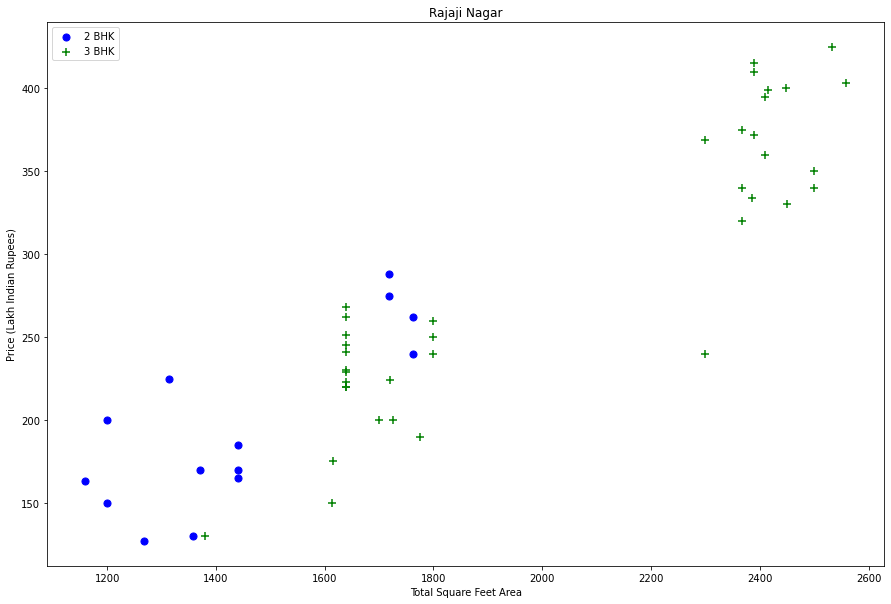

In [45]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

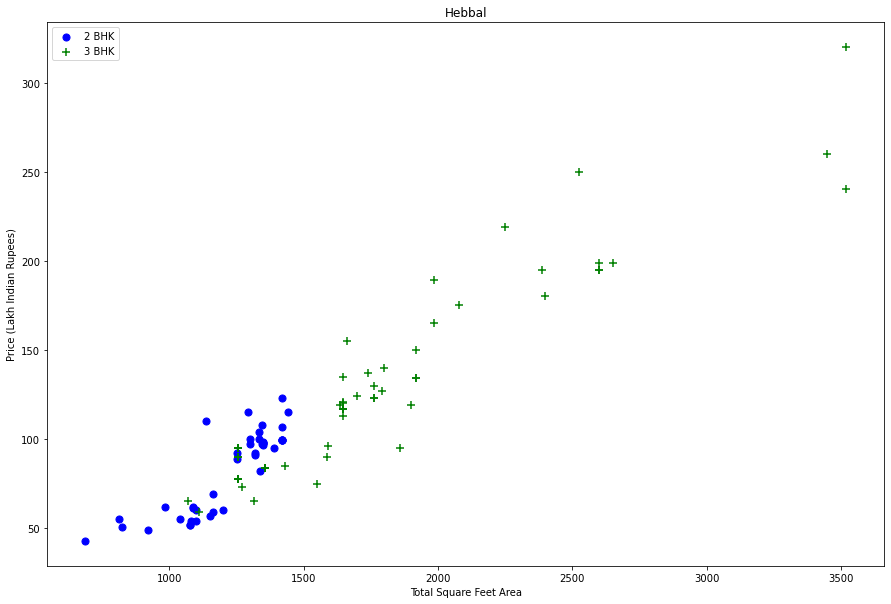

In [46]:
plot_scatter_chart(df7,"Hebbal")

##### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
##### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [60]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqrt),
                'std': np.std(bhk_df.price_per_sqrt),
                'count': bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqrt<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices,axis='index')
        
df8 = remove_bhk_outliers(df7)
#df8 = df7.copy()
df8.shape

(7329, 7)

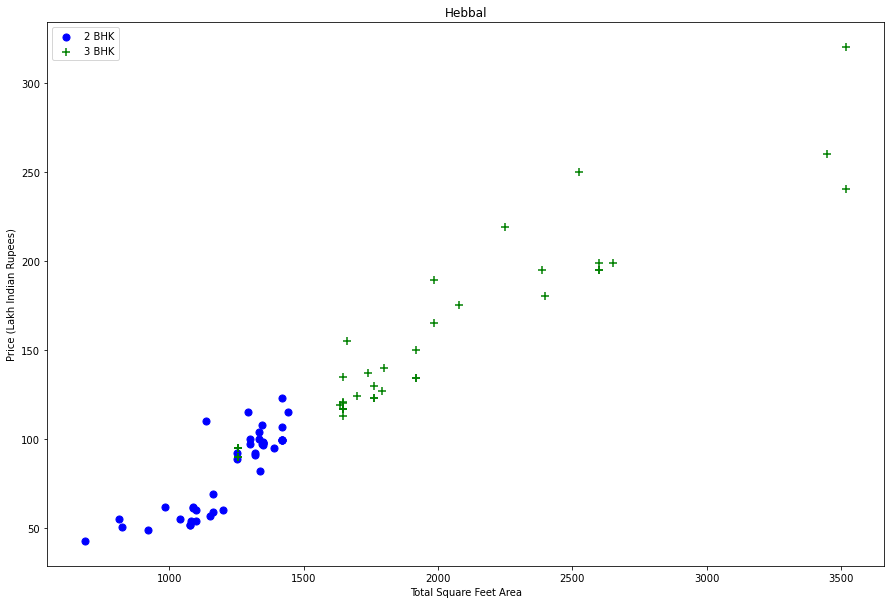

In [61]:
plot_scatter_chart(df8,"Hebbal")

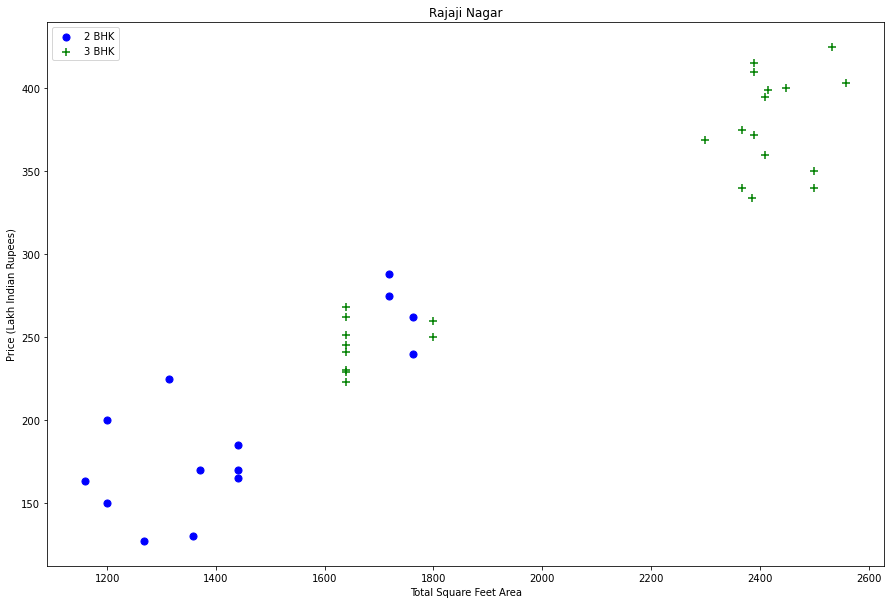

In [62]:
plot_scatter_chart(df8,"Rajaji Nagar")


### Outlier Removal Using Bathrooms Feature (Histogram)
Well now we need to ananlyse the now many properties and apartment is belongs to per_sqft price. Like under 1 thousand, who many property or under 2 thousand how many, to check that. Firsly need to put in histogram

In [63]:
# let's see the number of max number of bathroom in one property
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

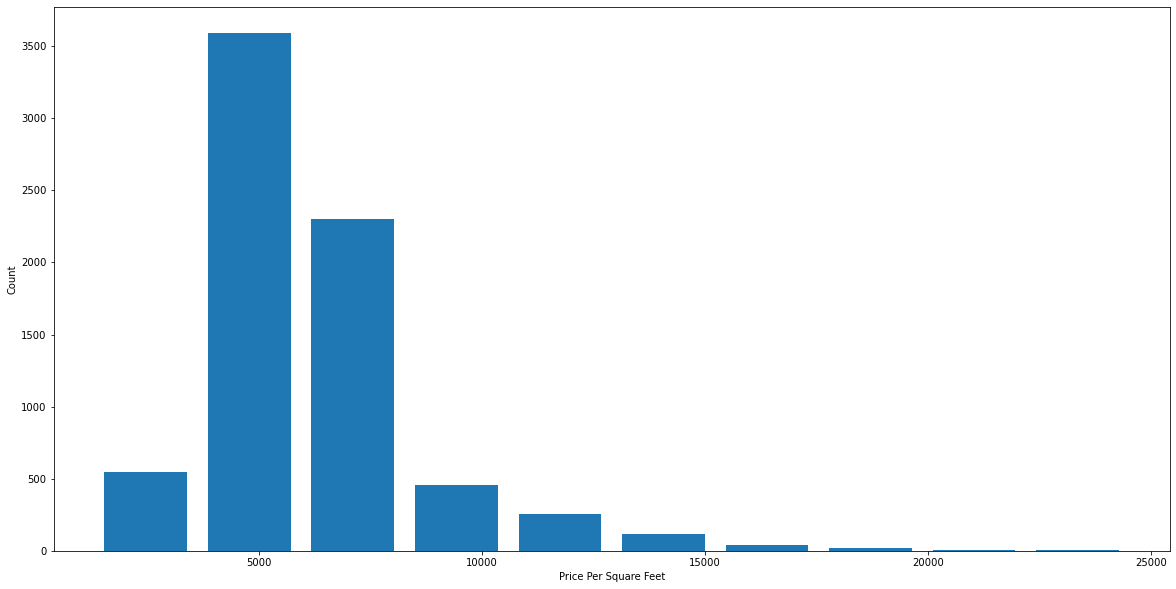

In [69]:
# let's check the property, whose belongs to price of sqft
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqrt,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

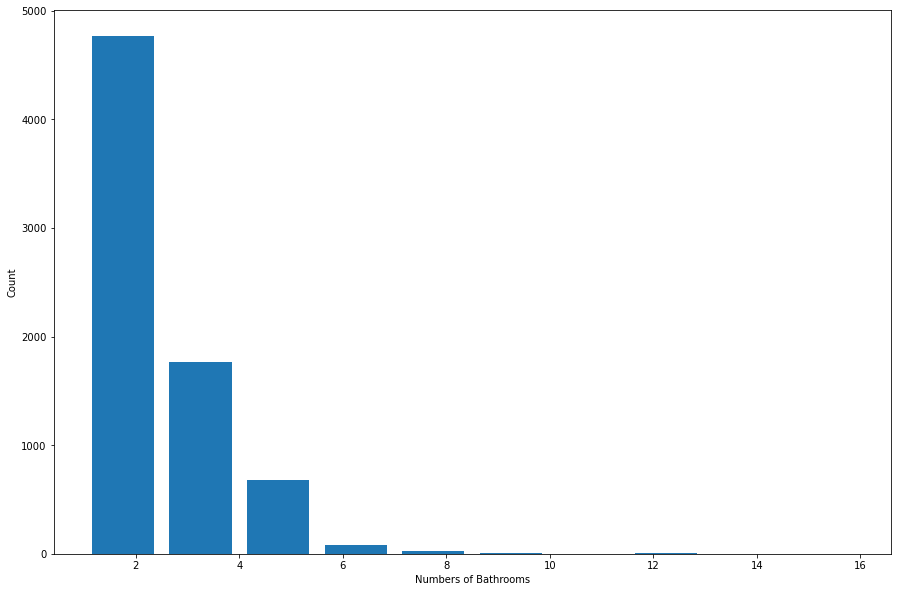

In [67]:
# Above showed the most of property is belongs to 5000k per sqft.
# Now let's see the property whose has most of bathroom
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Numbers of Bathrooms")
plt.ylabel("Count")

In [70]:
# Let's see the those property whose having more than 10 bathrooms
df8[df8.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqrt
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8486           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8575           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9308           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

In [71]:
# But suppose your manager said that, remove that property whose having bathroom greater than bedrooms, remove that
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
# Marked it is outlier and remove than
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqrt
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8411          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

###### Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [75]:
# Now lets put this outlier into new variable to remove that
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [76]:
# let's check the features and values
df9.head(3)

location   size  total_sqft  bath  price  bhk  price_per_sqrt
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333

In [78]:
# Now let's drop some features which is note necesessary
# like size and bhk is same, also perice per sqft is also not nedded,bcz it been used to redue outlier
df10 = df9.drop(['size','price_per_sqrt'], axis='columns')
df10.head(3)

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3

### Use One Hot Encoding For Location
Now you can see in the location, the value is in string, so we need to convert all into integer, for this we have to use HOT Encoding while executing dummies function

In [79]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  

[3 rows x 242 columns]

In [80]:
# Now i have created all the locations dummies columns
# Now will concat the df10 and dummies content in one df11 variable

df11 = pd.concat([df10, dummies.drop('other', axis ='columns')], axis = 'columns')
# we have droppen last column, becuase dummies always would be consider as (-1)
df11.head(3)

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  

[3 rows x 246 columns]

In [81]:
# now i will drop the location columns and will create new data set,bcz we already copied all the values and put them into columns
df12 = df11.drop('location', axis = 'columns')
df12.head(2)

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  

[2 rows x 245 columns]

In [82]:
df12.shape

(7251, 245)

## Building Model Now

In [108]:
# Now firstly we will create x variable data set for traine the MODEL
# now we don't have requirement for "Price" feature, bcz this is dependant variable
X = df12.drop('price', axis='columns')
X.head(3)

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  

[3 rows x 244 columns]

In [111]:
X.shape

(7251, 244)

In [86]:
# now let's take Y variable depednat ariable to test the Model
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [112]:
# Now will call the sklearn model to split data into traning and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [113]:
# will call Skearn linear model to apply linear_regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
# let's fit the data for traning
lr_clf.fit(X_train, y_train)
# Also find the score of the test accuracy
lr_clf.score(X_test, y_test)

0.8452277697873348

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [114]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# let's shuffle the data to train itself 5 times
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# lets do the cross validation to check the accuracy of 5 times trainned data
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

##### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# GridSearchCV 
GridSearchCV  will give us the best model to implement on the dataset. IT will give couple of model with accuracy to make sure such model which need to be implemented for best accuracy score

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    
# Let's create the score list to store the suffled accuracy 
# then will iterate the algos and fit them into dictonary and return the dictionary
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

model  best_score  \
0  linear_regression    0.818354   
1              lasso    0.687445   
2      decision_tree    0.742822   

                                         best_params  
0                               {'normalize': False}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...

#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Test the model for few properties
Let's see the columns index and indicate them all to 1

In [116]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [117]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.4990467659196

In [118]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.80519394619049

In [119]:
predict_price('Indira Nagar',1000, 2, 2)

181.27815484012922

In [120]:
predict_price('Indira Nagar',1000, 3, 3)

184.58430202040012

## Export the tested model to a pickle file

In [124]:
import pickle
with open("B:\DATA_SCIENCE\Data_Science_IBM_Material\HAND's_on_Project\Realestateindia\Banglore_home_prices_model.pickle",'wb') as f:
    pickle.dump(lr_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [125]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("B:\DATA_SCIENCE\Data_Science_IBM_Material\HAND's_on_Project\Realestateindia\columns.json","w") as f:
    f.write(json.dumps(columns))

# Happy Ending of the RealEstate Prediction